In [0]:
#!pip install openpyxl
#!pip install xlrd

In [0]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
columns = ['class','Alcohol','Malic acid', 'Ash', 'Alcalinity_ash','Magnesium', 
           'Total phenols','Flavanoids', 'Nonflavanoid', 'Proanthocyanins',
           'Color intensity','Hue','OD280/OD315','Proline']

In [0]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=columns)

In [4]:
wine.head()

class  Alcohol  Malic acid   Ash  Alcalinity_ash  Magnesium  Total phenols  \
0      1    14.23        1.71  2.43            15.6        127           2.80   
1      1    13.20        1.78  2.14            11.2        100           2.65   
2      1    13.16        2.36  2.67            18.6        101           2.80   
3      1    14.37        1.95  2.50            16.8        113           3.85   
4      1    13.24        2.59  2.87            21.0        118           2.80   

   Flavanoids  Nonflavanoid  Proanthocyanins  Color intensity   Hue  \
0        3.06          0.28             2.29             5.64  1.04   
1        2.76          0.26             1.28             4.38  1.05   
2        3.24          0.30             2.81             5.68  1.03   
3        3.49          0.24             2.18             7.80  0.86   
4        2.69          0.39             1.82             4.32  1.04   

   OD280/OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


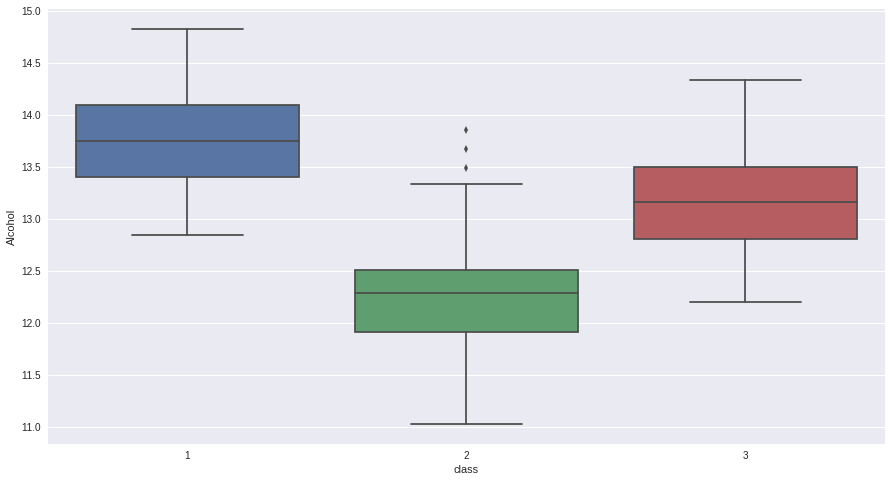

In [0]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Alcohol', data=wine, x='class')

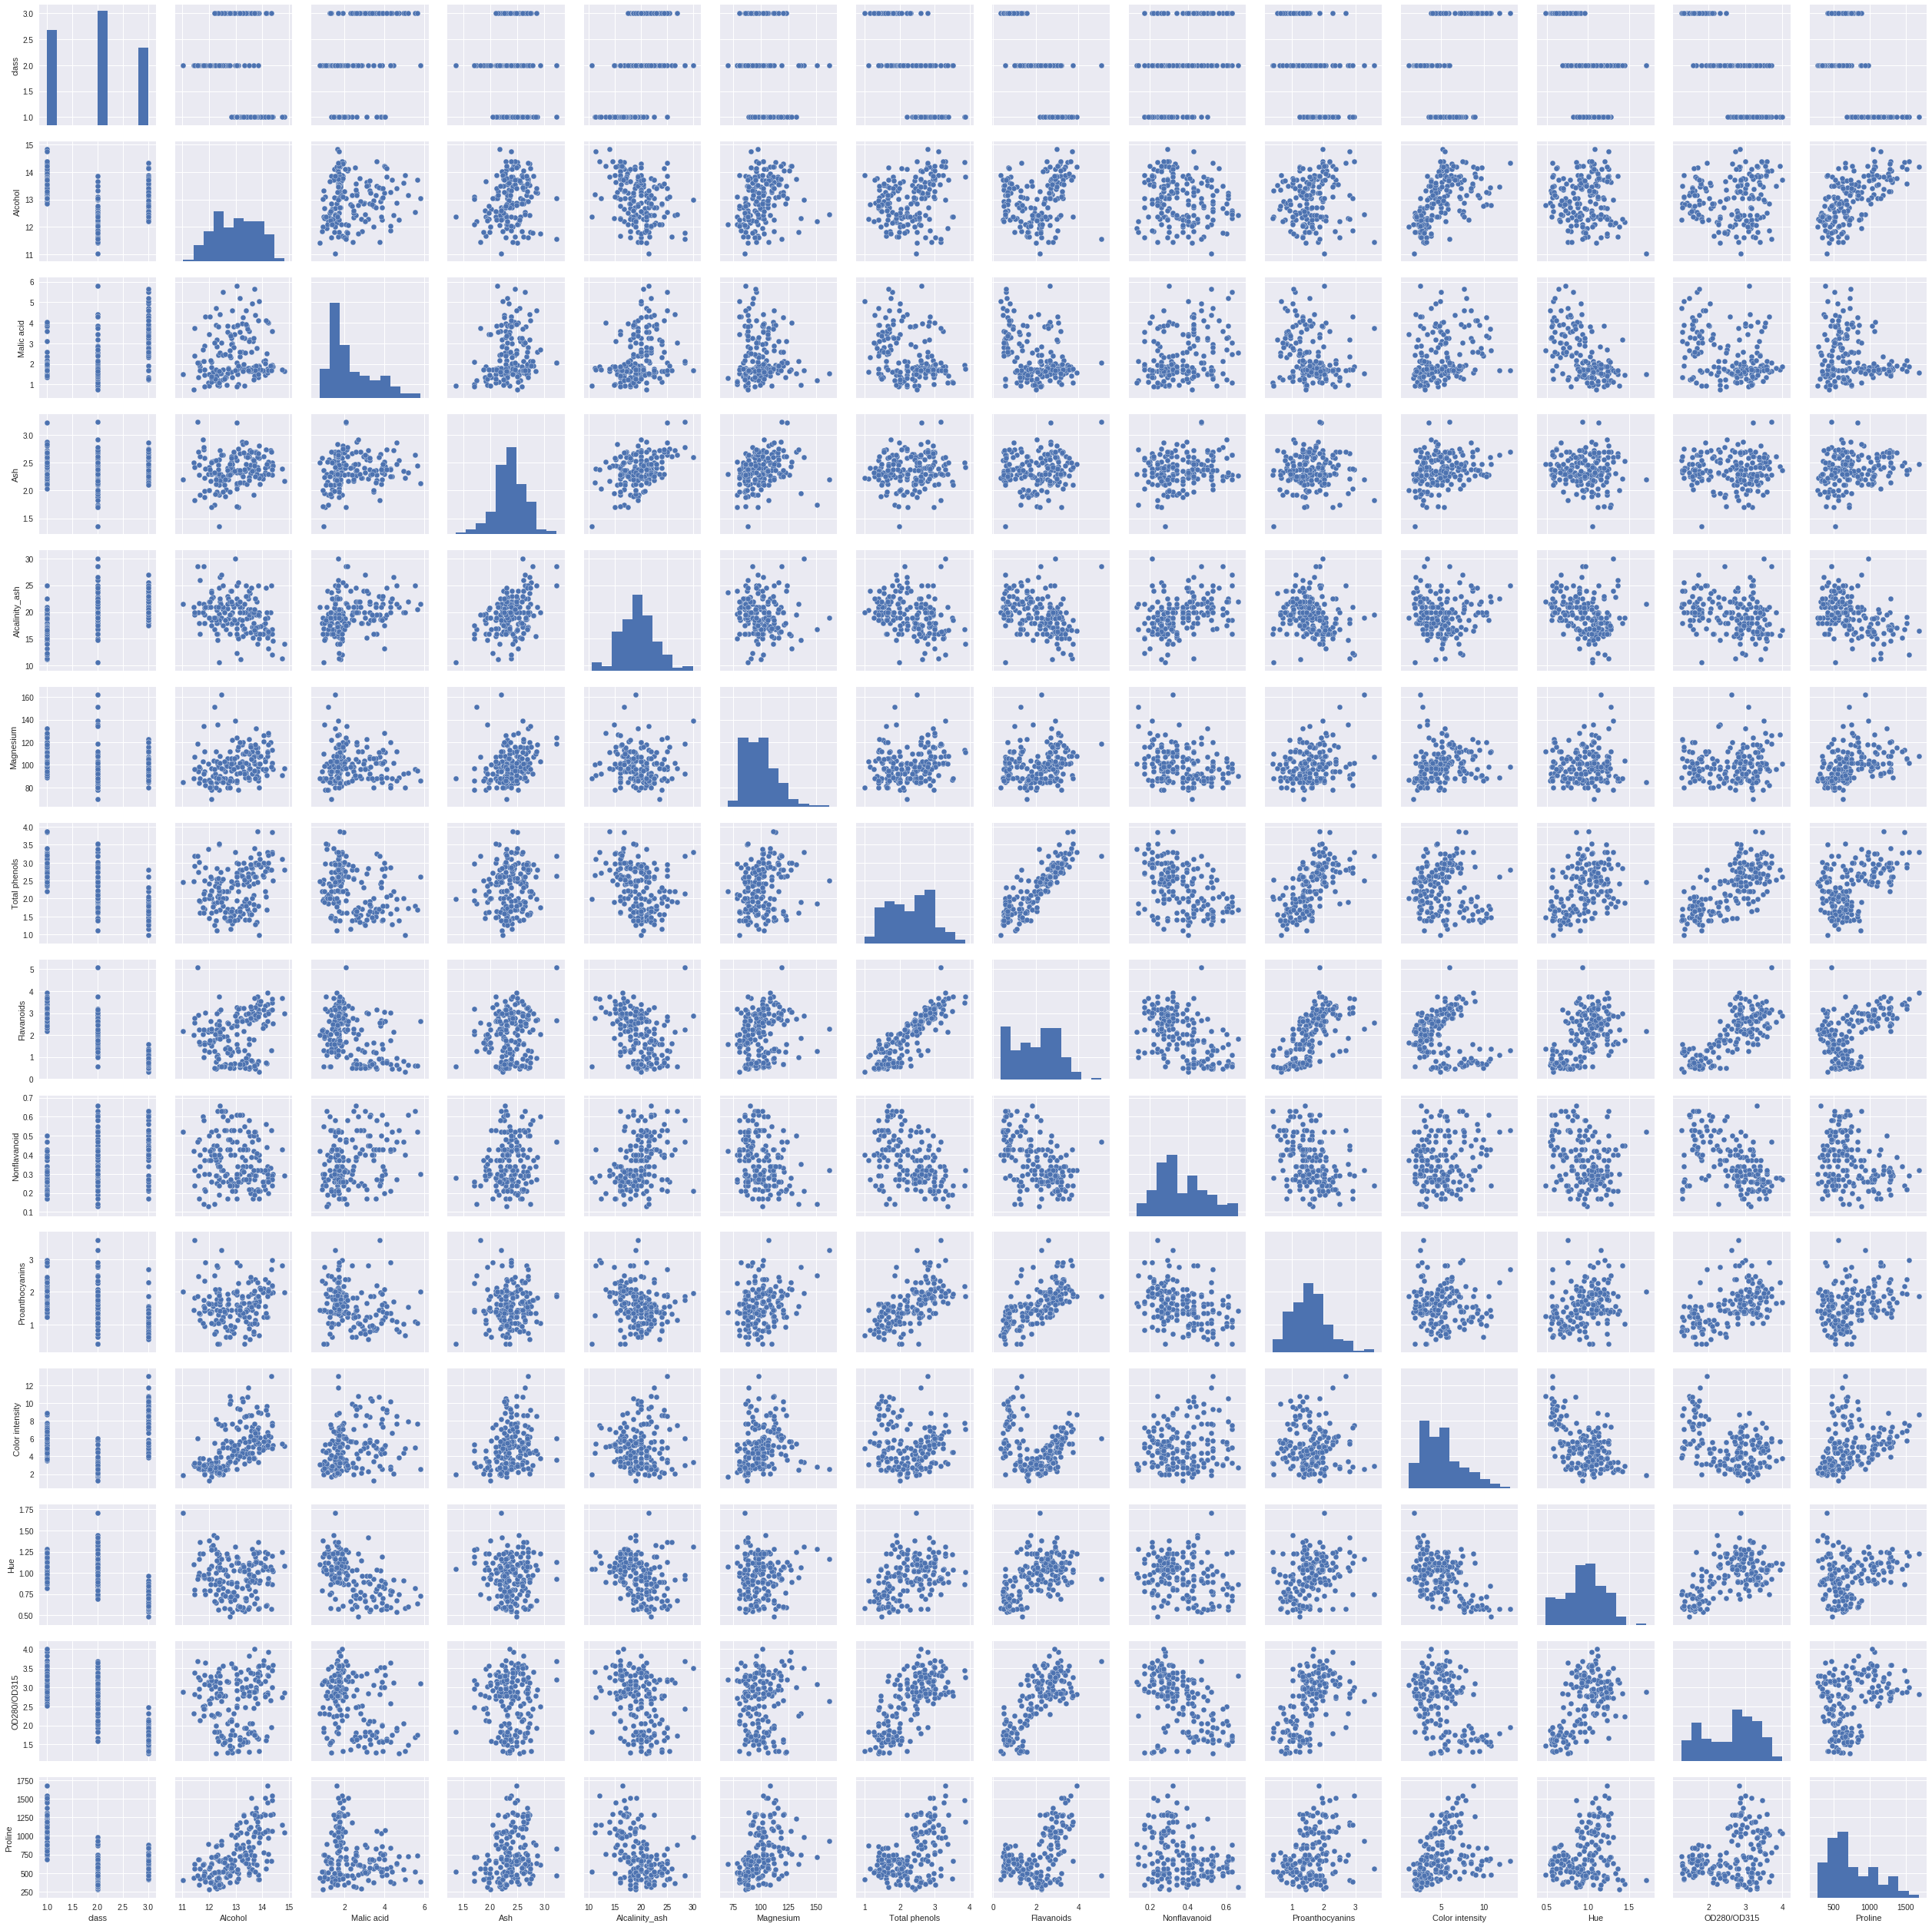

In [0]:
plt.figure(figsize=(15,8))
sns.pairplot(wine)

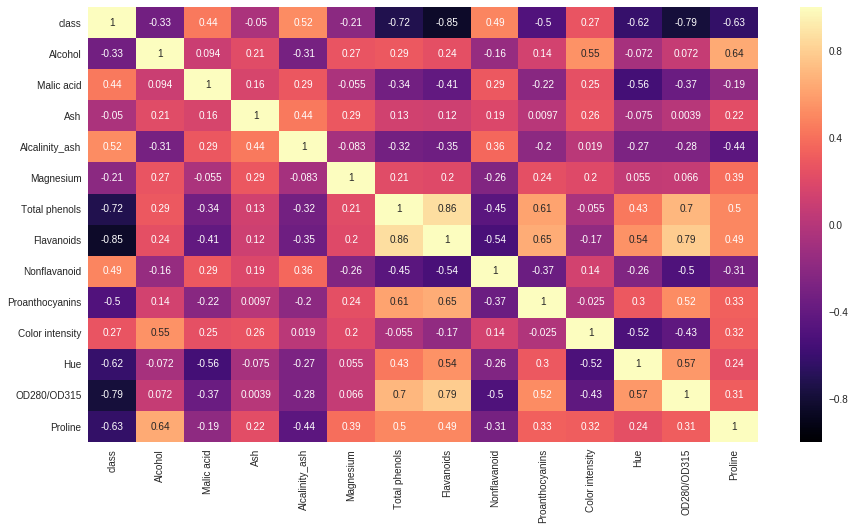

In [0]:
plt.figure(figsize=(15,8))
sns.heatmap(wine.corr(), annot=True, cmap='magma')


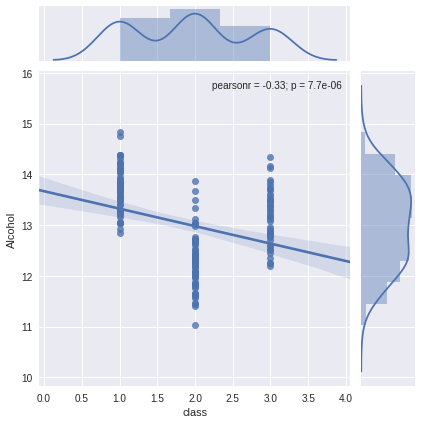

In [0]:
plt.figure(figsize=(15,8))
sns.jointplot(x='class', y='Alcohol', data=wine, kind='reg')

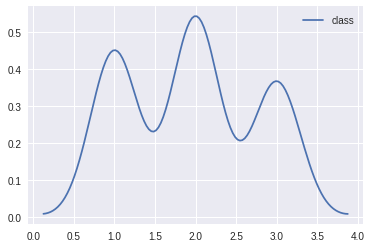

In [0]:
sns.kdeplot(wine['class'])

In [0]:
wine.isnull().sum()

class              0
Alcohol            0
Malic acid         0
Ash                0
Alcalinity_ash     0
Magnesium          0
Total phenols      0
Flavanoids         0
Nonflavanoid       0
Proanthocyanins    0
Color intensity    0
Hue                0
OD280/OD315        0
Proline            0
dtype: int64

# Build K-Classifier

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [8]:
scaler.fit(wine.drop('class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_properties = scaler.transform(wine.drop('class', axis=1))

In [0]:
wine_feat = pd.DataFrame(scaled_properties, columns=columns[1:])

In [14]:
wine_feat.head()

Alcohol  Malic acid       Ash  Alcalinity_ash  Magnesium  Total phenols  \
0  1.518613   -0.562250  0.232053       -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996       -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334       -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926       -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403        0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid  Proanthocyanins  Color intensity       Hue  \
0    1.034819     -0.659563         1.224884         0.251717  0.362177   
1    0.733629     -0.820719        -0.544721        -0.293321  0.406051   
2    1.215533     -0.498407         2.135968         0.269020  0.318304   
3    1.466525     -0.981875         1.032155         1.186068 -0.427544   
4    0.663351      0.226796         0.401404        -0.319276  0.362177   

   OD280/OD315   Proline  
0     1.847920  1.013009  
1     1.113449  0.965242  
2     0.788587  1.395148  
3     1.184071  2.334574  
4     0.449601 -0.037874

# Split the data

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
X = wine_feat
y = wine['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [0]:
wine_pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,wine_pred))
print(classification_report(y_test,wine_pred))

[[14  0  0]
 [ 1 16  2]
 [ 0  0 21]]
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.84      0.91        19
          3       0.91      1.00      0.95        21

avg / total       0.95      0.94      0.94        54



#Choose a correct k-value(centroid)

In [0]:
error_rate = []

for i in range(1,55):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  wine_pred_i = knn.predict(X_test)
  error_rate.append(np.mean(wine_pred_i != y_test))

Text(0,0.5,'Error Rate')

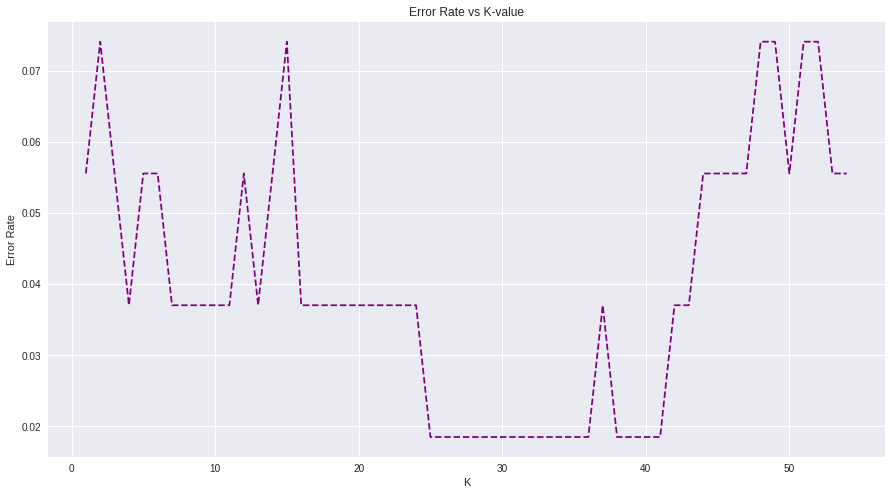

In [50]:
plt.figure(figsize=(15,8))
plt.plot(range(1,55),error_rate, color='purple', linestyle='dashed')
plt.title('Error Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Run the classifier with the adjusted and appropriate  k-cluster value

In [48]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
adj_wine_pred = knn.predict(X_test)

print(confusion_matrix(y_test,adj_wine_pred))
print('\n')
print(classification_report(y_test,adj_wine_pred))

[[14  0  0]
 [ 1 18  0]
 [ 0  0 21]]


             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.95      0.97        19
          3       1.00      1.00      1.00        21

avg / total       0.98      0.98      0.98        54

